<a href="https://colab.research.google.com/github/rizkyfalih/Hadist-Multilabel/blob/master/rnn_multilabel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hadist Multilabel RNN

## Import the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding, GRU,SimpleRNN
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from matplotlib import pyplot
%matplotlib inline

Using TensorFlow backend.


In [0]:
def extract_label(Y):
  Y1 = []
  Y2 = []
  Y3 = []

  for i in range(len(Y)):
    for j in range(len(Y[i])):
      if j == 0:
        Y1.append(Y[i][j])
      elif j == 1:
        Y2.append(Y[i][j])
      elif j == 2:
        Y3.append(Y[i][j])

  Y1 = np.array(Y1).reshape([-1,1])
  Y2 = np.array(Y2).reshape([-1,1])
  Y3 = np.array(Y3).reshape([-1,1])

  return Y1, Y2, Y3

## Processing the data

In [3]:
# reading data
df = pd.read_excel('Multilabel Clean.xlsx')
df[:10]

,Data,Anjuran,Larangan,Informasi,Bab Kitab,Unnamed: 5,Len Words,Unnamed: 7,Max
0,"Semua perbuatan tergantung niatnya, dan (balas...",0,0,1,1,NaN,35,NaN,732.0
1,Terkadang datang kepadaku seperti suara gemeri...,0,0,1,1,NaN,64,NaN,NaN
2,Bacalah? Beliau menjawab: Aku tidak bisa baca....,0,0,1,1,NaN,426,NaN,NaN
3,sangat kuat keinginannya untuk menghafalkan ap...,0,1,1,1,NaN,157,NaN,NaN
4,manusia yang paling lembut terutama pada bulan...,0,0,1,1,NaN,41,NaN,NaN
5,"Dari Muhammad, hamba Allah dan Rasul-Nya untuk...",1,1,1,1,NaN,559,NaN,NaN
6,Islam dibangun diatas lima (landasan); persaks...,0,0,1,2,NaN,24,NaN,NaN
7,"Iman memiliki lebih dari enam puluh cabang, da...",0,0,1,2,NaN,13,NaN,NaN
8,Seorang muslim adalah orang yang Kaum Muslimin...,0,1,1,2,NaN,64,NaN,NaN
9,Siapa yang Kaum Muslimin selamat dari lisan da...,0,0,1,2,NaN,9,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 9 columns):
Data          1059 non-null object
Anjuran       1059 non-null int64
Larangan      1059 non-null int64
Informasi     1059 non-null int64
Bab Kitab     1059 non-null int64
Unnamed: 5    0 non-null float64
Len Words     1059 non-null int64
Unnamed: 7    0 non-null float64
Max           1 non-null float64
dtypes: float64(3), int64(5), object(1)
memory usage: 74.5+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'Number of false and true anjuran information')

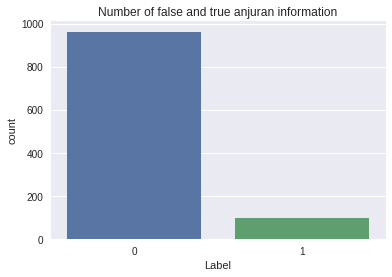

In [5]:
sns.countplot(df.Larangan)
plt.xlabel('Label')
plt.title('Number of false and true anjuran information')

### Initialize the data


In [0]:
X = df.Data
Y1 = df.Anjuran
Y2 = df.Larangan
Y3 = df.Informasi
le = LabelEncoder()

# Y1 = le.fit_transform(Y1)
# Y1 = Y1.reshape(-1,1)
Y1 = Y1.values.reshape([-1,1])

# Y2 = le.fit_transform(Y2)
# Y2 = Y2.reshape(-1,1)
Y2 = Y2.values.reshape([-1,1])

# Y3 = le.fit_transform(Y3)
# Y3 = Y3.reshape(-1,1)
Y3 = Y3.values.reshape([-1,1])

In [0]:
Y = np.zeros((len(Y1),3))
for i in range(len(Y)):
  for j in range(len(Y[i])):
    if j == 0:
      Y[i][j] = Y1[i]
    elif j == 1:
      Y[i][j] = Y2[i]
    elif j == 2:
      Y[i][j] = Y3[i]

In [9]:
Y.shape

(1059, 3)

### Split the data

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.20, shuffle=False)

In [0]:
Y1_train,Y2_train,Y3_train = extract_label(Y_train)

In [14]:
X_train.shape

(847,)

In [0]:
Y1_test,Y2_test,Y3_test = extract_label(Y_test)

### Preprocess data

#### Without preprocess data

In [0]:
max_words = 1000
max_len = 155
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len, truncating='post')

In [0]:
# Test1
max_words = 1000
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train)
sequences = tok.texts_to_sequences(X_train)

#count max token
num_tokens = np.array([len(tokens) for tokens in sequences])
max_len = int(np.mean(num_tokens) + 2 * np.std(num_tokens))
max_len

149

In [0]:
np.sum(num_tokens < max_len) / len(num_tokens)

0.9716646989374262

In [0]:
sequences_matrix[1]

array([342,  30,  82,  23, 182,   3,  65,   7,   7,  10, 322,  15,   5,
        60,  30, 831,  38,   7,   2, 603,   1, 832, 375,  53, 102,  39,
       496,  22,  12,  26, 604, 671, 274, 227,  23, 182,   7,   7,   3,
         5,  81,   1,  20,  66, 115, 605,   2, 439, 196,  16, 440,  40,
       113,  61, 473,   5,  57,  93,  17,  28,  45, 174, 174, 606,  30,
       831, 183, 182,   3,   8,  30, 831, 182,   3, 413,   5,  14, 741,
       441, 161,   5,  94,  32, 110,  13,  68,  37,   7, 497,   4,  85,
       245,   5, 190,  52, 672,  50,   5,  30,  82,  23, 673, 111,  21,
       228, 236,  77,  74,  13, 296, 183,  31, 442,  27,  14,   5,  11,
        11, 268,  30,  82, 322,  15,  39, 498,  90,   5,   3,  14,  30,
        82,   3, 237, 175,   5,   1,   7,   7,   3,  13, 237, 175,  30,
        82,  10,  39, 498,  44,  13, 145,  30, 742,  66,   6, 306],
      dtype=int32)

## Build RNN

In [0]:
from keras.models import Sequential
def testRNN():
    model = Sequential()
    model.add(Embedding(max_words, 64))
    model.add(SimpleRNN(64, init='uniform', dropout=0.2, recurrent_dropout=0.2))
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, init='uniform', activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#     inputs = Input(name='inputs',shape=[max_len])
#     layer = Embedding(max_words,50,input_length=max_len)(inputs)
#     layer = GRU(64)(layer)
#     layer = Dense(256,name='FC1')(layer)
#     layer = Activation('relu')(layer)
#     layer = Dropout(0.5)(layer)
#     layer = Dense(1,name='out_layer')(layer)
#     layer = Activation('sigmoid')(layer)
#     model = Model(inputs=inputs,outputs=layer)
    return model

In [0]:
model = testRNN()
model.summary()
# model1.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `SimpleRNN` call to the Keras 2 API: `SimpleRNN(64, dropout=0.2, recurrent_dropout=0.2, kernel_initializer="uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(3, activation="sigmoid", kernel_initializer="uniform")`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, None, 64)          64000     
_________________________________________________________________
simple_rnn_13 (SimpleRNN)    (None, 64)                8256      
_________________________________________________________________
dense_13 (Dense)             (None, 128)               8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 387       
Total params: 80,963
Trainable params: 80,963
Non-trainable params: 0
_________________________________________________________________


### Simple RNN

In [0]:
from keras.models import Sequential
def simpleRNN():
    model = Sequential()
    model.add(Embedding(max_words, 64))
    model.add(SimpleRNN(64))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#     inputs = Input(name='inputs',shape=[max_len])
#     layer = Embedding(max_words,50,input_length=max_len)(inputs)
#     layer = GRU(64)(layer)
#     layer = Dense(256,name='FC1')(layer)
#     layer = Activation('relu')(layer)
#     layer = Dropout(0.5)(layer)
#     layer = Dense(1,name='out_layer')(layer)
#     layer = Activation('sigmoid')(layer)
#     model = Model(inputs=inputs,outputs=layer)
    return model

In [20]:
modelSimple1 = simpleRNN()
modelSimple1.summary()
# model1.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 72,321
Trainable params: 72,321
Non-trainable params: 0
_________________________________________________________________


In [21]:
modelSimple2 = simpleRNN()
modelSimple2.summary()
# model2.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
simple_rnn_2 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 72,321
Trainable params: 72,321
Non-trainable params: 0
_________________________________________________________________


In [22]:
modelSimple3 = simpleRNN()
modelSimple3.summary()
# model3.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 72,321
Trainable params: 72,321
Non-trainable params: 0
_________________________________________________________________


### LSTM RNN

In [0]:
from keras.models import Sequential
def lstmRNN():
    model = Sequential()
    model.add(Embedding(max_words, 64))
    model.add(LSTM(64))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#     inputs = Input(name='inputs',shape=[max_len])
#     layer = Embedding(max_words,50,input_length=max_len)(inputs)
#     layer = GRU(64)(layer)
#     layer = Dense(256,name='FC1')(layer)
#     layer = Activation('relu')(layer)
#     layer = Dropout(0.5)(layer)
#     layer = Dense(1,name='out_layer')(layer)
#     layer = Activation('sigmoid')(layer)
#     model = Model(inputs=inputs,outputs=layer)
    return model

In [38]:
modelLSTM1 = lstmRNN()
modelLSTM1.summary()
# model1.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 97,089
Trainable params: 97,089
Non-trainable params: 0
_________________________________________________________________


In [39]:
modelLSTM2 = lstmRNN()
modelLSTM2.summary()
# model2.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
lstm_2 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 97,089
Trainable params: 97,089
Non-trainable params: 0
_________________________________________________________________


In [40]:
modelLSTM3 = lstmRNN()
modelLSTM3.summary()
# model3.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_6 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                33024     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 97,089
Trainable params: 97,089
Non-trainable params: 0
_________________________________________________________________


### GRU RNN

In [0]:
from keras.models import Sequential
def gruRNN():
    model = Sequential()
    model.add(Embedding(max_words, 64))
    model.add(GRU(64))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
#     inputs = Input(name='inputs',shape=[max_len])
#     layer = Embedding(max_words,50,input_length=max_len)(inputs)
#     layer = GRU(64)(layer)
#     layer = Dense(256,name='FC1')(layer)
#     layer = Activation('relu')(layer)
#     layer = Dropout(0.5)(layer)
#     layer = Dense(1,name='out_layer')(layer)
#     layer = Activation('sigmoid')(layer)
#     model = Model(inputs=inputs,outputs=layer)
    return model

In [56]:
modelGRU1 = gruRNN()
modelGRU1.summary()
# model1.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
gru_1 (GRU)                  (None, 64)                24768     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 65        
Total params: 88,833
Trainable params: 88,833
Non-trainable params: 0
_________________________________________________________________


In [57]:
modelGRU2 = gruRNN()
modelGRU2.summary()
# model2.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_8 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
gru_2 (GRU)                  (None, 64)                24768     
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 65        
Total params: 88,833
Trainable params: 88,833
Non-trainable params: 0
_________________________________________________________________


In [58]:
modelGRU3 = gruRNN()
modelGRU3.summary()
# model3.compile(loss='binary_crossentropy',optimizer=RMSprop(),metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 64)          64000     
_________________________________________________________________
gru_3 (GRU)                  (None, 64)                24768     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 88,833
Trainable params: 88,833
Non-trainable params: 0
_________________________________________________________________


## Build Model

In [59]:
model.fit(sequences_matrix1,Y_Train,batch_size=128,epochs=10,
          validation_split=0.2)

NameError: ignored

### Train the data with Simple RNN

In [23]:
history1 = modelSimple1.fit(sequences_matrix,Y1_train,batch_size=128,epochs=10,
          validation_split=0.2)

Instructions for updating:
Use tf.cast instead.
Train on 677 samples, validate on 170 samples
Epoch 1/10
677/677 [==============================] - 3s 5ms/step - loss: 0.5815 - acc: 0.7282 - val_loss: 0.4937 - val_acc: 0.8059
Epoch 2/10
677/677 [==============================] - 0s 412us/step - loss: 0.5042 - acc: 0.7784 - val_loss: 0.4938 - val_acc: 0.8059
Epoch 3/10
677/677 [==============================] - 0s 425us/step - loss: 0.4541 - acc: 0.8035 - val_loss: 0.5221 - val_acc: 0.7824
Epoch 4/10
677/677 [==============================] - 0s 410us/step - loss: 0.3773 - acc: 0.8419 - val_loss: 0.5587 - val_acc: 0.7588
Epoch 5/10
677/677 [==============================] - 0s 399us/step - loss: 0.4409 - acc: 0.7386 - val_loss: 0.5065 - val_acc: 0.8118
Epoch 6/10
677/677 [==============================] - 0s 410us/step - loss: 0.3256 - acc: 0.8582 - val_loss: 0.5035 - val_acc: 0.8059
Epoch 7/10
677/677 [==============================] - 0s 412us/step - loss: 0.2517 - acc: 0.9321 - val_l

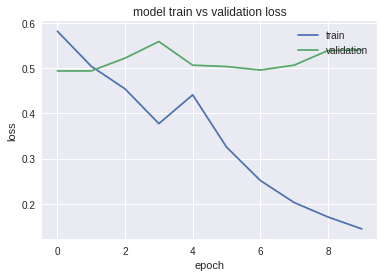

In [24]:
pyplot.plot(history1.history['loss'])
pyplot.plot(history1.history['val_loss'])
pyplot.title('model train vs validation loss')
pyplot.ylabel('loss')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'validation'], loc='upper right')
pyplot.show()

In [25]:
modelSimple2.fit(sequences_matrix,Y2_train,batch_size=128,epochs=10,
          validation_split=0.2)

Train on 677 samples, validate on 170 samples
Epoch 1/10
677/677 [==============================] - 1s 807us/step - loss: 0.4458 - acc: 0.8508 - val_loss: 0.3253 - val_acc: 0.9118
Epoch 2/10
677/677 [==============================] - 0s 413us/step - loss: 0.3390 - acc: 0.8892 - val_loss: 0.3046 - val_acc: 0.9118
Epoch 3/10
677/677 [==============================] - 0s 415us/step - loss: 0.3411 - acc: 0.8789 - val_loss: 0.3130 - val_acc: 0.9118
Epoch 4/10
677/677 [==============================] - 0s 415us/step - loss: 0.3124 - acc: 0.8892 - val_loss: 0.3311 - val_acc: 0.9118
Epoch 5/10
677/677 [==============================] - 0s 403us/step - loss: 0.2836 - acc: 0.8892 - val_loss: 0.3038 - val_acc: 0.9118
Epoch 6/10
677/677 [==============================] - 0s 412us/step - loss: 0.2422 - acc: 0.9084 - val_loss: 0.4358 - val_acc: 0.9000
Epoch 7/10
677/677 [==============================] - 0s 418us/step - loss: 0.2420 - acc: 0.9261 - val_loss: 0.3054 - val_acc: 0.9118
Epoch 8/10
677/6

In [26]:
modelSimple3.fit(sequences_matrix,Y3_train,batch_size=128,epochs=10,
          validation_split=0.2)

Train on 677 samples, validate on 170 samples
Epoch 1/10
677/677 [==============================] - 1s 871us/step - loss: 0.5737 - acc: 0.7223 - val_loss: 0.5147 - val_acc: 0.9471
Epoch 2/10
677/677 [==============================] - 0s 406us/step - loss: 0.3448 - acc: 0.9778 - val_loss: 0.4294 - val_acc: 0.9882
Epoch 3/10
677/677 [==============================] - 0s 404us/step - loss: 0.2574 - acc: 0.9778 - val_loss: 0.1737 - val_acc: 0.9882
Epoch 4/10
677/677 [==============================] - 0s 415us/step - loss: 0.1632 - acc: 0.9778 - val_loss: 0.1267 - val_acc: 0.9882
Epoch 5/10
677/677 [==============================] - 0s 421us/step - loss: 0.1316 - acc: 0.9778 - val_loss: 0.1027 - val_acc: 0.9882
Epoch 6/10
677/677 [==============================] - 0s 404us/step - loss: 0.1157 - acc: 0.9778 - val_loss: 0.0875 - val_acc: 0.9882
Epoch 7/10
677/677 [==============================] - 0s 407us/step - loss: 0.1063 - acc: 0.9778 - val_loss: 0.0802 - val_acc: 0.9882
Epoch 8/10
677/6

#### Save The Models

In [0]:
modelSimple1.save('modelSimple1.h5')

In [0]:
modelSimple2.save('modelSimple2.h5')

In [0]:
modelSimple3.save('modelSimple3.h5')

### Train the data with LSTM RNN

In [42]:
modelLSTM1.fit(sequences_matrix,Y1_train,batch_size=128,epochs=10,
          validation_split=0.2)

Train on 677 samples, validate on 170 samples
Epoch 1/10
677/677 [==============================] - 2s 3ms/step - loss: 0.6542 - acc: 0.7238 - val_loss: 0.6312 - val_acc: 0.8059
Epoch 2/10
677/677 [==============================] - 1s 2ms/step - loss: 0.5531 - acc: 0.7784 - val_loss: 0.4818 - val_acc: 0.8059
Epoch 3/10
677/677 [==============================] - 1s 2ms/step - loss: 0.4992 - acc: 0.7784 - val_loss: 0.4717 - val_acc: 0.8059
Epoch 4/10
677/677 [==============================] - 1s 2ms/step - loss: 0.4537 - acc: 0.7799 - val_loss: 0.4691 - val_acc: 0.8059
Epoch 5/10
677/677 [==============================] - 1s 2ms/step - loss: 0.4310 - acc: 0.7932 - val_loss: 0.4806 - val_acc: 0.8294
Epoch 6/10
677/677 [==============================] - 1s 2ms/step - loss: 0.3890 - acc: 0.8257 - val_loss: 0.4555 - val_acc: 0.8294
Epoch 7/10
677/677 [==============================] - 1s 2ms/step - loss: 0.3598 - acc: 0.8479 - val_loss: 0.4442 - val_acc: 0.8294
Epoch 8/10
677/677 [==========

In [44]:
modelLSTM2.fit(sequences_matrix,Y2_train,batch_size=128,epochs=10,
          validation_split=0.2)

Train on 677 samples, validate on 170 samples
Epoch 1/10
677/677 [==============================] - 2s 3ms/step - loss: 0.6309 - acc: 0.8139 - val_loss: 0.3451 - val_acc: 0.9118
Epoch 2/10
677/677 [==============================] - 1s 2ms/step - loss: 0.3601 - acc: 0.8892 - val_loss: 0.3338 - val_acc: 0.9118
Epoch 3/10
677/677 [==============================] - 1s 2ms/step - loss: 0.3513 - acc: 0.8892 - val_loss: 0.2976 - val_acc: 0.9118
Epoch 4/10
677/677 [==============================] - 1s 2ms/step - loss: 0.3075 - acc: 0.8892 - val_loss: 0.2947 - val_acc: 0.9118
Epoch 5/10
677/677 [==============================] - 1s 2ms/step - loss: 0.2737 - acc: 0.8922 - val_loss: 0.2974 - val_acc: 0.9118
Epoch 6/10
677/677 [==============================] - 1s 2ms/step - loss: 0.2293 - acc: 0.8996 - val_loss: 0.3031 - val_acc: 0.9118
Epoch 7/10
677/677 [==============================] - 1s 2ms/step - loss: 0.2157 - acc: 0.9173 - val_loss: 0.2962 - val_acc: 0.9118
Epoch 8/10
677/677 [==========

In [46]:
modelLSTM3.fit(sequences_matrix,Y3_train,batch_size=128,epochs=10,
          validation_split=0.2)

Train on 677 samples, validate on 170 samples
Epoch 1/10
677/677 [==============================] - 2s 3ms/step - loss: 0.6048 - acc: 0.8981 - val_loss: 0.0645 - val_acc: 0.9882
Epoch 2/10
677/677 [==============================] - 1s 2ms/step - loss: 0.1072 - acc: 0.9778 - val_loss: 0.0835 - val_acc: 0.9882
Epoch 3/10
677/677 [==============================] - 1s 2ms/step - loss: 0.1083 - acc: 0.9778 - val_loss: 0.0707 - val_acc: 0.9882
Epoch 4/10
677/677 [==============================] - 1s 2ms/step - loss: 0.1067 - acc: 0.9778 - val_loss: 0.0771 - val_acc: 0.9882
Epoch 5/10
677/677 [==============================] - 1s 2ms/step - loss: 0.1079 - acc: 0.9778 - val_loss: 0.0690 - val_acc: 0.9882
Epoch 6/10
677/677 [==============================] - 1s 2ms/step - loss: 0.1028 - acc: 0.9778 - val_loss: 0.0683 - val_acc: 0.9882
Epoch 7/10
677/677 [==============================] - 1s 2ms/step - loss: 0.1034 - acc: 0.9778 - val_loss: 0.0681 - val_acc: 0.9882
Epoch 8/10
677/677 [==========

#### Save The Models

In [0]:
modelLSTM1.save('modelLSTM1.h5')

In [0]:
modelLSTM2.save('modelLSTM2.h5')

In [0]:
modelLSTM3.save('modelLSTM3.h5')

### Train the data with GRU RNN

In [61]:
modelGRU1.fit(sequences_matrix,Y1_train,batch_size=128,epochs=10,
          validation_split=0.2)

Train on 677 samples, validate on 170 samples
Epoch 1/10
677/677 [==============================] - 2s 3ms/step - loss: 0.6650 - acc: 0.7238 - val_loss: 0.5893 - val_acc: 0.8059
Epoch 2/10
677/677 [==============================] - 1s 1ms/step - loss: 0.5281 - acc: 0.7784 - val_loss: 0.4739 - val_acc: 0.8059
Epoch 3/10
677/677 [==============================] - 1s 1ms/step - loss: 0.4563 - acc: 0.7784 - val_loss: 0.4772 - val_acc: 0.8118
Epoch 4/10
677/677 [==============================] - 1s 1ms/step - loss: 0.4122 - acc: 0.7917 - val_loss: 0.4559 - val_acc: 0.8176
Epoch 5/10
677/677 [==============================] - 1s 1ms/step - loss: 0.3641 - acc: 0.8109 - val_loss: 0.4566 - val_acc: 0.8176
Epoch 6/10
677/677 [==============================] - 1s 1ms/step - loss: 0.3169 - acc: 0.8464 - val_loss: 0.5061 - val_acc: 0.8176
Epoch 7/10
677/677 [==============================] - 1s 1ms/step - loss: 0.2763 - acc: 0.8715 - val_loss: 0.4575 - val_acc: 0.8059
Epoch 8/10
677/677 [==========

In [62]:
modelGRU2.fit(sequences_matrix,Y2_train,batch_size=128,epochs=10,
          validation_split=0.2)

Train on 677 samples, validate on 170 samples
Epoch 1/10
677/677 [==============================] - 2s 3ms/step - loss: 0.6498 - acc: 0.7962 - val_loss: 0.5249 - val_acc: 0.9118
Epoch 2/10
677/677 [==============================] - 1s 1ms/step - loss: 0.4226 - acc: 0.8892 - val_loss: 0.3495 - val_acc: 0.9118
Epoch 3/10
677/677 [==============================] - 1s 1ms/step - loss: 0.3184 - acc: 0.8892 - val_loss: 0.2799 - val_acc: 0.9118
Epoch 4/10
677/677 [==============================] - 1s 1ms/step - loss: 0.2713 - acc: 0.8892 - val_loss: 0.2815 - val_acc: 0.9118
Epoch 5/10
677/677 [==============================] - 1s 1ms/step - loss: 0.2474 - acc: 0.8907 - val_loss: 0.2842 - val_acc: 0.9118
Epoch 6/10
677/677 [==============================] - 1s 1ms/step - loss: 0.2129 - acc: 0.8966 - val_loss: 0.3301 - val_acc: 0.9118
Epoch 7/10
677/677 [==============================] - 1s 1ms/step - loss: 0.1942 - acc: 0.9055 - val_loss: 0.3154 - val_acc: 0.9118
Epoch 8/10
677/677 [==========

In [63]:
modelGRU3.fit(sequences_matrix,Y3_train,batch_size=128,epochs=10,
          validation_split=0.2)

Train on 677 samples, validate on 170 samples
Epoch 1/10
677/677 [==============================] - 2s 3ms/step - loss: 0.6310 - acc: 0.8641 - val_loss: 0.4671 - val_acc: 0.9882
Epoch 2/10
677/677 [==============================] - 1s 1ms/step - loss: 0.2851 - acc: 0.9778 - val_loss: 0.0631 - val_acc: 0.9882
Epoch 3/10
677/677 [==============================] - 1s 1ms/step - loss: 0.1112 - acc: 0.9778 - val_loss: 0.0574 - val_acc: 0.9882
Epoch 4/10
677/677 [==============================] - 1s 1ms/step - loss: 0.0950 - acc: 0.9778 - val_loss: 0.0538 - val_acc: 0.9882
Epoch 5/10
677/677 [==============================] - 1s 1ms/step - loss: 0.0824 - acc: 0.9778 - val_loss: 0.0528 - val_acc: 0.9882
Epoch 6/10
677/677 [==============================] - 1s 1ms/step - loss: 0.0775 - acc: 0.9778 - val_loss: 0.0498 - val_acc: 0.9882
Epoch 7/10
677/677 [==============================] - 1s 1ms/step - loss: 0.0709 - acc: 0.9778 - val_loss: 0.0481 - val_acc: 0.9882
Epoch 8/10
677/677 [==========

#### Save The Models

In [0]:
modelGRU1.save('modelGRU1.h5')

In [0]:
modelGRU2.save('modelGRU2.h5')

In [0]:
modelGRU3.save('modelGRU3.h5')

## Accuracy Data

In [0]:
test_sequences = tok.texts_to_sequences(X1_test)
test_sequences_matrix1 = sequence.pad_sequences(test_sequences,maxlen=max_len)

NameError: ignored

In [0]:
y_predict = model.predict(test_sequences_matrix1)

NameError: ignored

In [0]:
y_predict 

array([[0.19173816, 0.08064577, 0.98373425],
       [0.19113412, 0.08042666, 0.98384094],
       [0.19050124, 0.079907  , 0.9840975 ],
       [0.19038337, 0.08002397, 0.98398995],
       [0.19016719, 0.07940093, 0.98420733],
       [0.19238919, 0.08168149, 0.98343265],
       [0.19068974, 0.08013192, 0.98392594],
       [0.190727  , 0.07999209, 0.9839591 ],
       [0.1928702 , 0.08139902, 0.9836076 ],
       [0.19121426, 0.08062327, 0.98380816],
       [0.19061753, 0.08014762, 0.98401654],
       [0.19168788, 0.08117095, 0.98362374],
       [0.19116676, 0.08072308, 0.98377836],
       [0.19251224, 0.08144709, 0.9836021 ],
       [0.19085598, 0.08045769, 0.9838407 ],
       [0.19193101, 0.08102089, 0.9836587 ],
       [0.19170669, 0.0811162 , 0.9836385 ],
       [0.19075277, 0.08017609, 0.98399323],
       [0.19183126, 0.08110967, 0.9836981 ],
       [0.19187477, 0.08108369, 0.98368937],
       [0.1905404 , 0.08018908, 0.9840089 ],
       [0.19009843, 0.07968938, 0.9841809 ],
       [0.

### Accuracy with Simple RNN

In [0]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [28]:
test_sequences_matrix1

NameError: ignored

In [0]:
y1_predict = modelSimple1.predict_classes(test_sequences_matrix)
y2_predict = modelSimple2.predict_classes(test_sequences_matrix)
y3_predict = modelSimple3.predict_classes(test_sequences_matrix)

In [96]:
y2_predict

array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    

In [0]:
Y_pred = np.zeros((len(y3_predict),3))
for i in range(len(Y_pred)):
  for j in range(len(Y_pred[i])):
    if j == 0:
      Y_pred[i][j] = y1_predict[i]
    elif j == 1:
      Y_pred[i][j] = y2_predict[i]
    elif j == 2:
      Y_pred[i][j] = y3_predict[i]

In [34]:
Y_pred[:200]

array([[0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 1.],
       [0., 0., 1.],
       [1., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [0]:
Y_real = np.zeros((len(y3_predict),3))
for i in range(len(Y_real)):
  for j in range(len(Y_real[i])):
    if j == 0:
      Y_real[i][j] = Y1_test[i]
    elif j == 1:
      Y_real[i][j] = Y2_test[i]
    elif j == 2:
      Y_real[i][j] = Y3_test[i]

In [0]:
Y_real[:10]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 1., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.]])

In [99]:
from sklearn.metrics import hamming_loss
hamming_loss(Y_real, Y_pred)

0.1069182389937107

### Accuracy with LSTM RNN

In [0]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [0]:
y1_predict = modelLSTM1.predict_classes(test_sequences_matrix)
y2_predict = modelLSTM2.predict_classes(test_sequences_matrix)
y3_predict = modelLSTM3.predict_classes(test_sequences_matrix)

In [0]:
Y_pred = np.zeros((len(y3_predict),3))
for i in range(len(Y_pred)):
  for j in range(len(Y_pred[i])):
    if j == 0:
      Y_pred[i][j] = y1_predict[i]
    elif j == 1:
      Y_pred[i][j] = y2_predict[i]
    elif j == 2:
      Y_pred[i][j] = y3_predict[i]

In [103]:
Y_pred[:200]

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 1., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [0., 0., 1.],
       [1., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 1.],
       [0., 0., 1.],
       [1., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0

In [0]:
Y_real = np.zeros((len(y3_predict),3))
for i in range(len(Y_real)):
  for j in range(len(Y_real[i])):
    if j == 0:
      Y_real[i][j] = Y1_test[i]
    elif j == 1:
      Y_real[i][j] = Y2_test[i]
    elif j == 2:
      Y_real[i][j] = Y3_test[i]

In [105]:
from sklearn.metrics import hamming_loss
hamming_loss(Y_real, Y_pred)

0.0880503144654088

### Accuracy with GRU RNN

In [0]:
test_sequences = tok.texts_to_sequences(X_test)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)

In [0]:
y1_predict = modelGRU1.predict_classes(test_sequences_matrix)
y2_predict = modelGRU2.predict_classes(test_sequences_matrix)
y3_predict = modelGRU3.predict_classes(test_sequences_matrix)

In [0]:
Y_pred = np.zeros((len(y3_predict),3))
for i in range(len(Y_pred)):
  for j in range(len(Y_pred[i])):
    if j == 0:
      Y_pred[i][j] = y1_predict[i]
    elif j == 1:
      Y_pred[i][j] = y2_predict[i]
    elif j == 2:
      Y_pred[i][j] = y3_predict[i]

In [0]:
Y_real = np.zeros((len(y3_predict),3))
for i in range(len(Y_real)):
  for j in range(len(Y_real[i])):
    if j == 0:
      Y_real[i][j] = Y1_test[i]
    elif j == 1:
      Y_real[i][j] = Y2_test[i]
    elif j == 2:
      Y_real[i][j] = Y3_test[i]

In [110]:
from sklearn.metrics import hamming_loss
hamming_loss(Y_real, Y_pred)

0.09905660377358491